## Bootcamp Data Science ING - Jarosław Jaros, grupa IV

## Projekt: Temat 2 
Przewidywanie wzięcia pożyczki. Celem projektu jest zastosowanie modeli klasyfikacji (binarnej) do przewidzenia czy pożyczka zostanie udzielona danemu klientowi z danymi parametrami wniosku.

Link do danych: https://raw.githubusercontent.com/saimadhu-polamuri/DataHakthon3X/master/dataSet/Train.csv

Opis danych (najdokładniejszy jaki istnieje): https://discuss.analyticsvidhya.com/t/hackathon-3-x-predict-customer-worth-for-happy-customer-b ank/3802

Zmienna celu (wypłacenie pożyczki): Disbursed

Wymogi:

● Zmienna LoggedIn nie może być uwzględniona w modelowaniu - należy ją od razu wyrzucić ze zbioru.

● Nie usuwamy żadnych obserwacji - braki danych uzupełniamy w jakiś sposób.

● Wszelkie nieoczywiste przekształcenia danych należy opatrzyć uzasadnieniem dlaczego dokonujemy tego przekształcenia (np. robimy wykres i uzasadniamy wzięci logarytmu ze zmiennej tym, że rozkład jest skośny).

● Należy wykorzystać przynajmniej 3 metody klasyfikacji.

● Należy uwzględnić optymalizację modeli/pipelinów.

● Projekt musi być zakończony przejrzystym porównaniem przetestowanych rozwiązań (modeli/pipelinów) w postaci tabeli, gdzie jeden wiersz opisuje jedno rozwiązanie i jego wynik.

##### Datasets:

Input variables:

* ID - Unique ID (can not be used for predictions)
* Gender- Sex
* City - Current City
* Monthly_Income - Monthly Income in rupees
* DOB - Date of Birth
* Lead_Creation_Date - Lead Created on date
* Loan_Amount_Applied - Loan Amount Requested (INR)
* Loan_Tenure_Applied - Loan Tenure Requested (in years)
* Existing_EMI - EMI of Existing Loans (INR)
* Employer_Name - Employer Name
* Salary_Account- Salary account with Bank
* Mobile_Verified - Mobile Verified (Y/N)
* Var5- Continuous classified variable
* Var1- Categorical variable with multiple levels
* Loan_Amount_Submitted- Loan Amount Revised and Selected after seeing Eligibility
* Loan_Tenure_Submitted- Loan Tenure Revised and Selected after seeing Eligibility (Years)
* Interest_Rate- Interest Rate of Submitted Loan Amount
* Processing_Fee- Processing Fee of Submitted Loan Amount (INR)
* EMI_Loan_Submitted- EMI of Submitted Loan Amount (INR)
* Filled_Form- Filled Application form post quote
* Device_Type- Device from which application was made (Browser/ Mobile)
* Var2- Categorical Variable with multiple Levels
* Source- Categorical Variable with multiple Levels
* Var4- Categorical Variable with multiple Levels



##### Outcomes:

* LoggedIn- Application Logged (Variable for understanding the problem – cannot be used in prediction)
* Disbursed- Loan Disbursed (Target Variable)

## Zaczynamy - Import podstawowych bibliotek

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
# Ustawiam ignorowanie "pandas warnigów"
import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
warnings.simplefilter(action = "ignore", category = FutureWarning)


### Import Danych 
- Dane zostały pobrane ręcznie i umieszczone w katalagu ..\Dane

In [3]:
data = pd.read_csv("Dane/Train.csv", sep=",", encoding = "latin1")
print(data.shape)

(87020, 26)


### Usuwam ze zbioru zmienne które nie mogą być używane
- LoggedIn
- ID 

In [4]:
del data['ID']
del data['LoggedIn']
print(data.shape)

(87020, 24)


In [5]:
data.head()

,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,...,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,Disbursed
0,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,HDFC Bank,...,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,1,0
1,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),ICICI Bank,...,2.0,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0
2,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,State Bank of India,...,4.0,NaN,NaN,NaN,N,Web-browser,B,S143,1,0
3,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,State Bank of India,...,5.0,NaN,NaN,NaN,N,Web-browser,B,S143,3,0
4,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,HDFC Bank,...,2.0,NaN,NaN,NaN,N,Web-browser,B,S134,3,0


## Exploracyjna analiza danych

- Zmienna celu (wypłacenie pożyczki): Disbursed
- Sprawdzam liczebność klas

In [6]:
disbursed_counts = data['Disbursed'].value_counts()
disbursed_counts

0    85747
1     1273
Name: Disbursed, dtype: int64

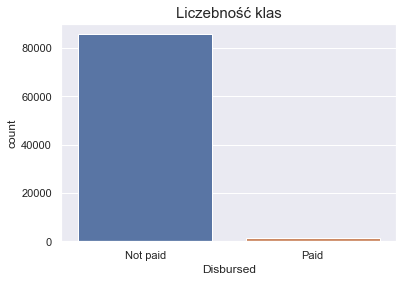

In [7]:
sns.countplot(x='Disbursed',data=data) 
plt.xticks((0, 1), ['Not paid', 'Paid'])
plt.title('Liczebność klas', y=1, fontdict={'fontsize': 15});

- policzę jeszcze % udzielonych pożyczek w stosunku do całej bazy

In [8]:
paid = data[data['Disbursed'] == 1].shape[0]
not_paid = data[data['Disbursed'] == 0].shape[0]
percent_loan = paid / (paid + not_paid)

print(f"Liczba wypłaconych pożyczek = {percent_loan * 100:.2f} %")


Liczba wypłaconych pożyczek = 1.46 %


## Wniosek - Klasy są silnie niezbalansowane !!

### Przejrzyję po koleji wszystkie dane

- Na początku tworzę kantenery na zmienne numeryczne i categoryczne

In [9]:
num_variables = []
cat_variables = []

In [10]:
data.info() # przejrzenie pliku

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 87020 non-null  object 
 1   City                   86017 non-null  object 
 2   Monthly_Income         87020 non-null  int64  
 3   DOB                    87020 non-null  object 
 4   Lead_Creation_Date     87020 non-null  object 
 5   Loan_Amount_Applied    86949 non-null  float64
 6   Loan_Tenure_Applied    86949 non-null  float64
 7   Existing_EMI           86949 non-null  float64
 8   Employer_Name          86949 non-null  object 
 9   Salary_Account         75256 non-null  object 
 10  Mobile_Verified        87020 non-null  object 
 11  Var5                   87020 non-null  int64  
 12  Var1                   87020 non-null  object 
 13  Loan_Amount_Submitted  52407 non-null  float64
 14  Loan_Tenure_Submitted  52407 non-null  float64
 15  In

In [11]:
data.isna().sum() # przejrzenie ilość braków

Gender                       0
City                      1003
Monthly_Income               0
DOB                          0
Lead_Creation_Date           0
Loan_Amount_Applied         71
Loan_Tenure_Applied         71
Existing_EMI                71
Employer_Name               71
Salary_Account           11764
Mobile_Verified              0
Var5                         0
Var1                         0
Loan_Amount_Submitted    34613
Loan_Tenure_Submitted    34613
Interest_Rate            59294
Processing_Fee           59600
EMI_Loan_Submitted       59294
Filled_Form                  0
Device_Type                  0
Var2                         0
Source                       0
Var4                         0
Disbursed                    0
dtype: int64

In [12]:
data.nunique() # i wartości unikalne

Gender                       2
City                       697
Monthly_Income            5825
DOB                      11345
Lead_Creation_Date          92
Loan_Amount_Applied        277
Loan_Tenure_Applied         11
Existing_EMI              3753
Employer_Name            43567
Salary_Account              57
Mobile_Verified              2
Var5                        19
Var1                        19
Loan_Amount_Submitted      203
Loan_Tenure_Submitted        6
Interest_Rate               73
Processing_Fee             571
EMI_Loan_Submitted        4530
Filled_Form                  2
Device_Type                  2
Var2                         7
Source                      30
Var4                         8
Disbursed                    2
dtype: int64

## Zaczynamy od zmiennych Kategorycznych
### - Zmienna 'Gender'

In [13]:
data['Gender'].isna().sum() #sprawdzam czy nie ma braków danych

0

In [14]:
data['Gender'].value_counts()

Male      49848
Female    37172
Name: Gender, dtype: int64

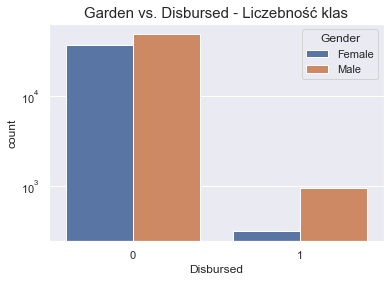

In [15]:
sns.countplot(x='Disbursed', hue='Gender', data=data)
plt.title('Garden vs. Disbursed - Liczebność klas', y=1, fontdict={'fontsize': 15})
plt.yscale('log')

In [16]:
cat_variables.append('Gender')


### - Zmienna 'City'

In [17]:
data['City'].isna().sum() #sprawdzam czy nie ma braków danych

1003

In [18]:
data['City'].value_counts()

Delhi             12527
Bengaluru         10824
Mumbai            10795
Hyderabad          7272
Chennai            6916
                  ...  
Surendra Nagar        1
LUNAWADA              1
Rampur                1
Himatnagar            1
Bandipore             1
Name: City, Length: 697, dtype: int64

In [19]:
data['City'].value_counts().iloc[:20]

Delhi            12527
Bengaluru        10824
Mumbai           10795
Hyderabad         7272
Chennai           6916
Pune              5207
Kolkata           2888
Ahmedabad         1788
Jaipur            1331
Gurgaon           1212
Coimbatore        1147
Thane              905
Chandigarh         870
Surat              802
Visakhapatnam      764
Indore             734
Vadodara           624
Nagpur             594
Lucknow            580
Ghaziabad          560
Name: City, dtype: int64

In [20]:
#weźmy miasta występujące u przynajmniej 1000 klientów wynik zapiszmy w nowym polu My_City dla reszty przypisze "O"
data['My_City'] = data.City.map({'Delhi':'D', 
                               'Bengaluru':'B',
                               'Mumbai':'M',
                               'Hyderabad':'H',
                               'Chennai': 'C',
                               'Pune': 'P',
                               'Kolkata':'K',
                               'Ahmedabad':'A',
                               'Jaipur':'J',
                               'Gurgaon':'G',
                               'Coimbatore':'Co'}).fillna('O')

In [21]:
data['My_City'].isna().sum()

0

In [22]:
# Kasuje niepotrzebną już zminną. Nowe wartości sa w 'My_City'
del data['City']

In [23]:
cat_variables.append('My_City')

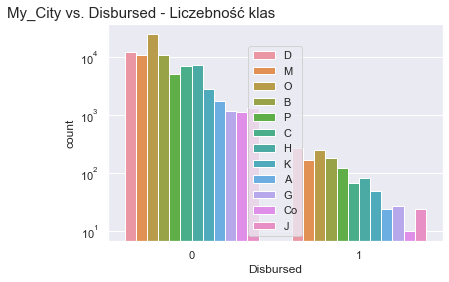

In [24]:
sns.countplot(x='Disbursed', hue='My_City', data=data)
plt.title('My_City vs. Disbursed - Liczebność klas', x = 0.1, y=1, fontdict={'fontsize': 15})
plt.legend()
plt.yscale('log')


## Zmienna 'DOB' i zmienna 'Load_Creation_Date' zostaną usunięte po utworzeniu z nich zmiennej AGE - wiek klienta w dniu wnioskowania o pożyczkę (dane nadmiarowe)

### - ZMIENNA 'DOB'

In [25]:
#sprawdzam czy nie ma braków danych
data['DOB'].isna().sum()

0

In [26]:
data['DOB'].value_counts()

11-Nov-80    306
02-Jan-70    226
01-Jan-70    148
01-Jan-90    131
01-Jan-80    111
            ... 
03-Sep-66      1
13-Jun-63      1
31-Dec-50      1
12-Aug-56      1
19-Apr-74      1
Name: DOB, Length: 11345, dtype: int64

In [27]:
# Wciągam rok ze zmiennej 'DOB', 
data['DOB'] = pd.to_datetime(data['DOB'])
data['DOB'] = [x.year for x in data['DOB']]
# rozwiązanie problomu z datami
data['DOB'] = np.where(data.DOB <2000, data['DOB'], data['DOB']-100)

In [28]:
data['DOB'].value_counts()

1988    7134
1987    6754
1989    6628
1986    6451
1990    6224
        ... 
1941       2
1938       1
1929       1
1932       1
1936       1
Name: DOB, Length: 61, dtype: int64

In [29]:
data['Lead_Creation_Date'].value_counts()

03-Jul-15    2315
23-Jul-15    1994
30-Jul-15    1297
27-Jul-15    1292
31-Jul-15    1268
             ... 
24-May-15     502
31-May-15     498
12-Jul-15     475
10-May-15     459
14-Jun-15     373
Name: Lead_Creation_Date, Length: 92, dtype: int64

In [30]:
# Wciągam rok ze zmiennej 'Lead_Creation_Date'
data['Lead_Creation_Date'] = pd.to_datetime(data['Lead_Creation_Date'])
data['Lead_Creation_Date'] = [x.year for x in data['Lead_Creation_Date']]

In [31]:
data['Lead_Creation_Date'].value_counts()

2015    87020
Name: Lead_Creation_Date, dtype: int64

In [32]:
data['Age'] = data['Lead_Creation_Date']-data['DOB']
data.head()

,Gender,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,Mobile_Verified,...,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,Disbursed,My_City,Age
0,Female,20000,1978,2015,300000.0,5.0,0.0,CYBOSOL,HDFC Bank,N,...,NaN,NaN,N,Web-browser,G,S122,1,0,D,37
1,Male,35000,1985,2015,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),ICICI Bank,Y,...,NaN,6762.9,N,Web-browser,G,S122,3,0,M,30
2,Male,22500,1981,2015,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,State Bank of India,Y,...,NaN,NaN,N,Web-browser,B,S143,1,0,O,34
3,Male,35000,1987,2015,1000000.0,5.0,0.0,BIHAR GOVERNMENT,State Bank of India,Y,...,NaN,NaN,N,Web-browser,B,S143,3,0,O,28
4,Male,100000,1984,2015,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,HDFC Bank,Y,...,NaN,NaN,N,Web-browser,B,S134,3,0,B,31


In [33]:
data['Age'].describe()

count    87020.000000
mean        30.904171
std          7.147194
min         18.000000
25%         26.000000
50%         29.000000
75%         34.000000
max        100.000000
Name: Age, dtype: float64

In [34]:
data[data['DOB'] < 1930].shape[0]

18

In [35]:
data[data['DOB'] < 1930]

,Gender,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,Mobile_Verified,...,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,Disbursed,My_City,Age
60139,Male,0,1915,2015,0.0,0.0,0.0,0,NaN,Y,...,NaN,NaN,N,Web-browser,G,S122,0,0,B,100
60141,Male,0,1915,2015,0.0,0.0,0.0,0,NaN,Y,...,NaN,NaN,N,Web-browser,G,S122,0,0,H,100
60496,Male,8333,1915,2015,0.0,0.0,0.0,0,NaN,Y,...,NaN,NaN,N,Web-browser,G,S122,0,0,A,100
60498,Male,0,1915,2015,0.0,0.0,0.0,0,NaN,Y,...,NaN,NaN,N,Web-browser,G,S122,0,0,O,100
62623,Male,41667,1929,2015,0.0,0.0,0.0,0,NaN,Y,...,NaN,NaN,N,Web-browser,G,S122,5,0,M,86
64278,Male,0,1915,2015,0.0,0.0,0.0,0,NaN,Y,...,NaN,NaN,N,Web-browser,G,S122,0,0,B,100
70130,Female,24000,1915,2015,100000.0,0.0,8.0,0,NaN,N,...,NaN,NaN,N,Web-browser,G,S122,7,0,O,100
74092,Male,0,1915,2015,0.0,0.0,0.0,0,NaN,Y,...,NaN,NaN,N,Web-browser,G,S122,0,0,O,100
74093,Male,0,1915,2015,0.0,0.0,0.0,0,NaN,Y,...,NaN,NaN,N,Web-browser,G,S122,0,0,D,100
74094,Male,0,1915,2015,0.0,0.0,0.0,0,NaN,Y,...,NaN,NaN,N,Web-browser,G,S122,0,0,D,100


Text(0.5, 1, 'Klienci powyżej 85 lat')

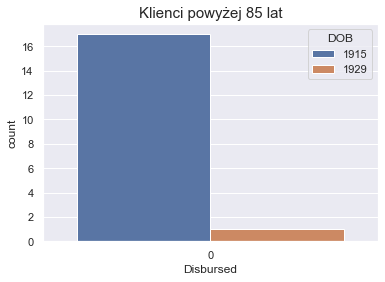

In [36]:
sns.countplot(x='Disbursed', hue='DOB', data=data[data['DOB'] < 1930])
plt.title('Klienci powyżej 85 lat', y=1, fontdict={'fontsize': 15})

In [37]:
# Po uprzednim sprawdzeniu ilości 
# i upewnieniu się że zaden z tych klientów nie dostał pożyczki 
# usuwam z bazy klientów powyżej 85 lat (tacy klienci z założenia nie dostaną kredytu) - 18. rekordów

In [38]:
data = data[data.DOB>1930]

In [39]:
# Usuwam juz niepotrzebne zmienne 'DOB' i 'Lead_Creation_Date'
del data['DOB']
del data['Lead_Creation_Date']
print(data.shape)

(87002, 23)


Text(0.5, 1.0, 'Age vs. Disbursed - Rozkład')

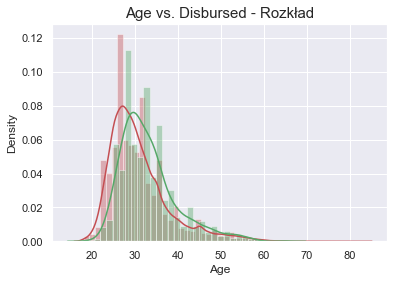

In [40]:
sns.distplot(data['Age'][data['Disbursed'] == 0], color='r')
sns.distplot(data['Age'][data['Disbursed'] == 1], color='g')
plt.title('Age vs. Disbursed - Rozkład', fontdict={'fontsize': 15})

In [41]:
num_variables.append('Age') #Dodaję zmienną Age do kontenera zmiennych num.

###  - Zmienna 'Employer_Name'

In [42]:
#sprawdzam ilość braków danych
data['Employer_Name'].isna().sum()

71

In [43]:
data.Employer_Name.value_counts()

0                                               4896
TATA CONSULTANCY SERVICES LTD (TCS)              550
COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD     404
ACCENTURE SERVICES PVT LTD                       324
GOOGLE                                           301
                                                ... 
WILLOWOOD CROP SCIENCES PVT LTD                    1
NETERWALA AIBARA INTERRIOR ARCHITECT               1
DHOOT COMPACK LTD                                  1
POLYGEL INDUSTRIES PVT LTD                         1
MEROFORM INDIA PVT LTD                             1
Name: Employer_Name, Length: 43567, dtype: int64

In [44]:
# Mamy 71 "pustych wpisów" i 4896 wpisów z 0 - Potraktuje tych kliejentów jako 1 osobowe firmy
# (sami się zatrudniają)
# Zapiszemy wynik w 'My_Employees' - W tem sposób dostaniemy 
# liczność danej firmy w naszej bazie a potem zeskalujemy w ten sposób otrzymane dane logarytmem

In [45]:
dict_firmy = data.Employer_Name.value_counts().to_dict()

In [46]:
dict_firmy['0'] = 1 #tam, gdzie nie ma pracodawcy, podmieniam wartość na 1 (firma 1-osobowa)

In [47]:
data['My_Employees'] = data.Employer_Name.map(dict_firmy).fillna(1).astype(int)

In [48]:
data['My_Employees'] = np.log(data['My_Employees'])

In [49]:
data['My_Employees'].isna().sum()

0

In [50]:
# Usuwam już niepotrzebną zmieną 'Employer_Name' w jej miejsce mamy nową zmienną 'My_Employees'
del data['Employer_Name'] 

In [51]:
data.isna().sum()

Gender                       0
Monthly_Income               0
Loan_Amount_Applied         71
Loan_Tenure_Applied         71
Existing_EMI                71
Salary_Account           11746
Mobile_Verified              0
Var5                         0
Var1                         0
Loan_Amount_Submitted    34595
Loan_Tenure_Submitted    34595
Interest_Rate            59276
Processing_Fee           59582
EMI_Loan_Submitted       59276
Filled_Form                  0
Device_Type                  0
Var2                         0
Source                       0
Var4                         0
Disbursed                    0
My_City                      0
Age                          0
My_Employees                 0
dtype: int64

In [52]:
num_variables.append('My_Employees')

### - Zmienna 'Salary_Account'

In [53]:
data['Salary_Account'].isna().sum() #sprawdzam ilość braków danych

11746

In [54]:
data['Salary_Account'].value_counts()

HDFC Bank                                          17695
ICICI Bank                                         13636
State Bank of India                                11843
Axis Bank                                           8783
Citibank                                            2376
Kotak Bank                                          2067
IDBI Bank                                           1550
Punjab National Bank                                1201
Bank of India                                       1170
Bank of Baroda                                      1126
Standard Chartered Bank                              995
Canara Bank                                          990
Union Bank of India                                  951
Yes Bank                                             779
ING Vysya                                            678
Corporation bank                                     649
Indian Overseas Bank                                 612
State Bank of Hyderabad        

In [55]:
#Zostawiam 10 najczęściej występujących Banków reszcie przypisuje 'Other Bank')
bank_counts = data['Salary_Account'].value_counts()
big_banks = list(bank_counts.index[:10]) 

In [56]:
def convert_bank(bank):
    if bank['Salary_Account'] in big_banks:
        return bank['Salary_Account']
    else:
        return 'Other Bank'
        
data['Salary_Account'] = data.apply(convert_bank, axis=1)

In [57]:
data['Salary_Account'].value_counts()

Other Bank              25555
HDFC Bank               17695
ICICI Bank              13636
State Bank of India     11843
Axis Bank                8783
Citibank                 2376
Kotak Bank               2067
IDBI Bank                1550
Punjab National Bank     1201
Bank of India            1170
Bank of Baroda           1126
Name: Salary_Account, dtype: int64

In [58]:
data['Salary_Account'].isna().sum()

0

In [59]:
cat_variables.append('Salary_Account')

### - Zmienna 'Mobile_Verified'

In [60]:
data['Mobile_Verified'].isna().sum() #sprawdzam ilość braków danych

0

In [61]:

data['Mobile_Verified'].value_counts()

Y    56464
N    30538
Name: Mobile_Verified, dtype: int64

In [62]:
x2 = data.groupby(['Mobile_Verified'])['Disbursed'].mean()
x2

Mobile_Verified
N    0.007433
Y    0.018525
Name: Disbursed, dtype: float64

In [63]:
cat_variables.append('Mobile_Verified')

### - Zmienna 'Device_Type'

In [64]:
data['Device_Type'].isna().sum() #sprawdzam ilość braków danych

0

In [65]:
data['Device_Type'].value_counts()

Web-browser    64298
Mobile         22704
Name: Device_Type, dtype: int64

In [66]:
x2 = data.groupby(['Device_Type'])['Disbursed'].mean()
x2

Device_Type
Mobile         0.011628
Web-browser    0.015693
Name: Disbursed, dtype: float64

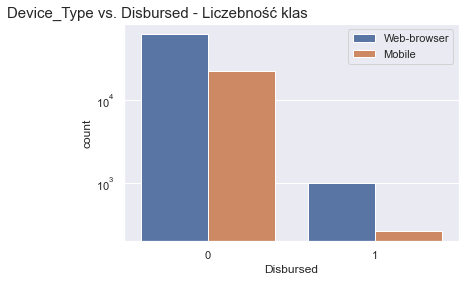

In [67]:
sns.countplot(x='Disbursed', hue='Device_Type', data=data)
plt.title('Device_Type vs. Disbursed - Liczebność klas', x = 0.1, y=1, fontdict={'fontsize': 15})
plt.legend()
plt.yscale('log')

In [68]:
cat_variables.append('Device_Type')

### - Zmienna 'Source'

In [69]:
data['Source'].isna().sum() #sprawdzam ilość braków danych

0

In [70]:
data['Source'].value_counts()

S122    38549
S133    29885
S159     5599
S143     4332
S127     1931
S137     1724
S134     1301
S161      769
S151      720
S157      650
S153      494
S156      308
S144      299
S158      208
S123       73
S141       57
S162       36
S124       24
S160       11
S150       10
S155        4
S129        3
S136        3
S138        3
S139        3
S135        2
S154        1
S130        1
S125        1
S140        1
Name: Source, dtype: int64

In [71]:
#Podobnie jak przy zmiennej 'City', wybieram Source o liczności >=1000 dla pozostałych przypisuje 'S000'
source_counts = data['Source'].value_counts()
big_source= list(source_counts.index[:7]) 

In [72]:
big_source

['S122', 'S133', 'S159', 'S143', 'S127', 'S137', 'S134']

In [73]:
def convert_source(source):
    if source['Source'] in big_source:
        return source['Source']
    else:
        return 'S000'
        
data['Source'] = data.apply(convert_source, axis=1)

In [74]:
data['Source'].value_counts()

S122    38549
S133    29885
S159     5599
S143     4332
S000     3681
S127     1931
S137     1724
S134     1301
Name: Source, dtype: int64

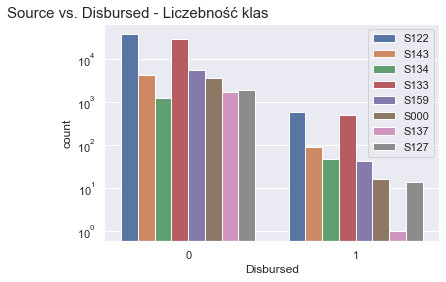

In [75]:
sns.countplot(x='Disbursed', hue='Source', data=data)
plt.title('Source vs. Disbursed - Liczebność klas', x = 0.1, y=1, fontdict={'fontsize': 15})
plt.legend()
plt.yscale('log')

In [76]:
cat_variables.append('Source')

### - Zmienna 'Var5'

In [77]:
data['Var5'].isna().sum() #sprawdzam ilość braków danych

0

In [78]:
data['Var5'].value_counts()

0     29069
1     12236
3      6759
11     5204
2      4485
14     3662
15     3509
12     2989
13     2622
8      2515
10     2427
9      2281
16     2097
4      1815
17     1691
7      1489
6       983
5       975
18      194
Name: Var5, dtype: int64

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87002 entries, 0 to 87019
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 87002 non-null  object 
 1   Monthly_Income         87002 non-null  int64  
 2   Loan_Amount_Applied    86931 non-null  float64
 3   Loan_Tenure_Applied    86931 non-null  float64
 4   Existing_EMI           86931 non-null  float64
 5   Salary_Account         87002 non-null  object 
 6   Mobile_Verified        87002 non-null  object 
 7   Var5                   87002 non-null  int64  
 8   Var1                   87002 non-null  object 
 9   Loan_Amount_Submitted  52407 non-null  float64
 10  Loan_Tenure_Submitted  52407 non-null  float64
 11  Interest_Rate          27726 non-null  float64
 12  Processing_Fee         27420 non-null  float64
 13  EMI_Loan_Submitted     27726 non-null  float64
 14  Filled_Form            87002 non-null  object 
 15  De

In [80]:
# zamiana typu - Zmienną będę traktował jako zmienną kategoryczną
data["Var5"] = data["Var5"].astype('str',copy=False)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87002 entries, 0 to 87019
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 87002 non-null  object 
 1   Monthly_Income         87002 non-null  int64  
 2   Loan_Amount_Applied    86931 non-null  float64
 3   Loan_Tenure_Applied    86931 non-null  float64
 4   Existing_EMI           86931 non-null  float64
 5   Salary_Account         87002 non-null  object 
 6   Mobile_Verified        87002 non-null  object 
 7   Var5                   87002 non-null  object 
 8   Var1                   87002 non-null  object 
 9   Loan_Amount_Submitted  52407 non-null  float64
 10  Loan_Tenure_Submitted  52407 non-null  float64
 11  Interest_Rate          27726 non-null  float64
 12  Processing_Fee         27420 non-null  float64
 13  EMI_Loan_Submitted     27726 non-null  float64
 14  Filled_Form            87002 non-null  object 
 15  De

In [82]:
cat_variables.append('Var5')

### - Zmienna 'Var1'

In [83]:
data['Var1'].isna().sum() #sprawdzam ilość braków danych

0

In [84]:
data['Var1'].value_counts()

HBXX    59276
HBXC     9010
HBXB     4479
HAXA     2909
HBXA     2123
HAXB     2011
HBXD     1964
HAXC     1536
HBXH      970
HCXF      722
HAYT      508
HAVC      384
HAXM      268
HCXD      237
HCYS      217
HVYS      186
HAZD      109
HCXG       78
HAXF       15
Name: Var1, dtype: int64

In [85]:
cat_variables.append('Var1')

### - Zmienna 'Filled_Form'

In [86]:
data['Filled_Form'].isna().sum() #sprawdzam czy nie ma braków danych

0

In [87]:
data['Filled_Form'].value_counts()

N    67512
Y    19490
Name: Filled_Form, dtype: int64

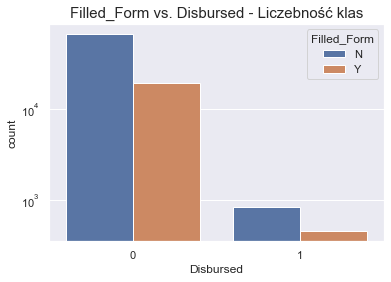

In [88]:
sns.countplot(x='Disbursed', hue='Filled_Form', data=data)
plt.title('Filled_Form vs. Disbursed - Liczebność klas', y=1, fontdict={'fontsize': 15})
plt.yscale('log')

In [89]:
cat_variables.append('Filled_Form')

### - Zmienna 'Var2'

In [90]:
data['Var2'].isna().sum() #sprawdzam ilość braków danych

0

In [91]:
data['Var2'].value_counts()

B    37280
G    33014
C    14210
E     1315
D      634
F      544
A        5
Name: Var2, dtype: int64

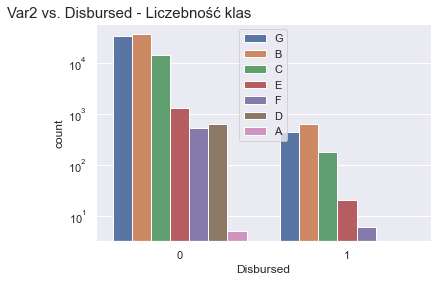

In [92]:
sns.countplot(x='Disbursed', hue='Var2', data=data)
plt.title('Var2 vs. Disbursed - Liczebność klas', x = 0.1, y=1, fontdict={'fontsize': 15})
plt.legend()
plt.yscale('log')

In [93]:
cat_variables.append('Var2')

### - Zmienna 'Var4'

In [94]:
data['Var4'].isna().sum() #sprawdzam ilość braków danych

0

In [95]:
data['Var4'].value_counts()

3    25260
1    23906
5    20265
4     6577
2     5931
0     2530
7     2301
6      232
Name: Var4, dtype: int64

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87002 entries, 0 to 87019
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 87002 non-null  object 
 1   Monthly_Income         87002 non-null  int64  
 2   Loan_Amount_Applied    86931 non-null  float64
 3   Loan_Tenure_Applied    86931 non-null  float64
 4   Existing_EMI           86931 non-null  float64
 5   Salary_Account         87002 non-null  object 
 6   Mobile_Verified        87002 non-null  object 
 7   Var5                   87002 non-null  object 
 8   Var1                   87002 non-null  object 
 9   Loan_Amount_Submitted  52407 non-null  float64
 10  Loan_Tenure_Submitted  52407 non-null  float64
 11  Interest_Rate          27726 non-null  float64
 12  Processing_Fee         27420 non-null  float64
 13  EMI_Loan_Submitted     27726 non-null  float64
 14  Filled_Form            87002 non-null  object 
 15  De

In [97]:
# Podobnie jak w przypadku 'Var5' zamianiam typ - Zmienną będę traktował jako zmienną kategoryczną
data['Var4'] = data['Var4'].astype('str',copy=False)

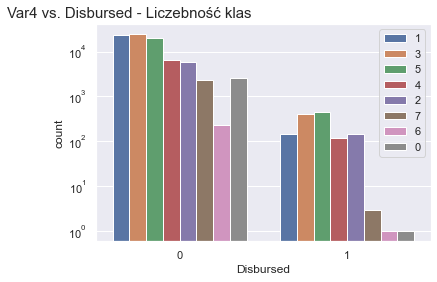

In [98]:
sns.countplot(x='Disbursed', hue='Var4', data=data)
plt.title('Var4 vs. Disbursed - Liczebność klas', x = 0.1, y=1, fontdict={'fontsize': 15})
plt.legend()
plt.yscale('log')

In [99]:
cat_variables.append('Var4')

In [100]:
#Ilości unikalnych 
data[cat_variables].nunique()

Gender              2
My_City            12
Salary_Account     11
Mobile_Verified     2
Device_Type         2
Source              8
Var5               19
Var1               19
Filled_Form         2
Var2                7
Var4                8
dtype: int64

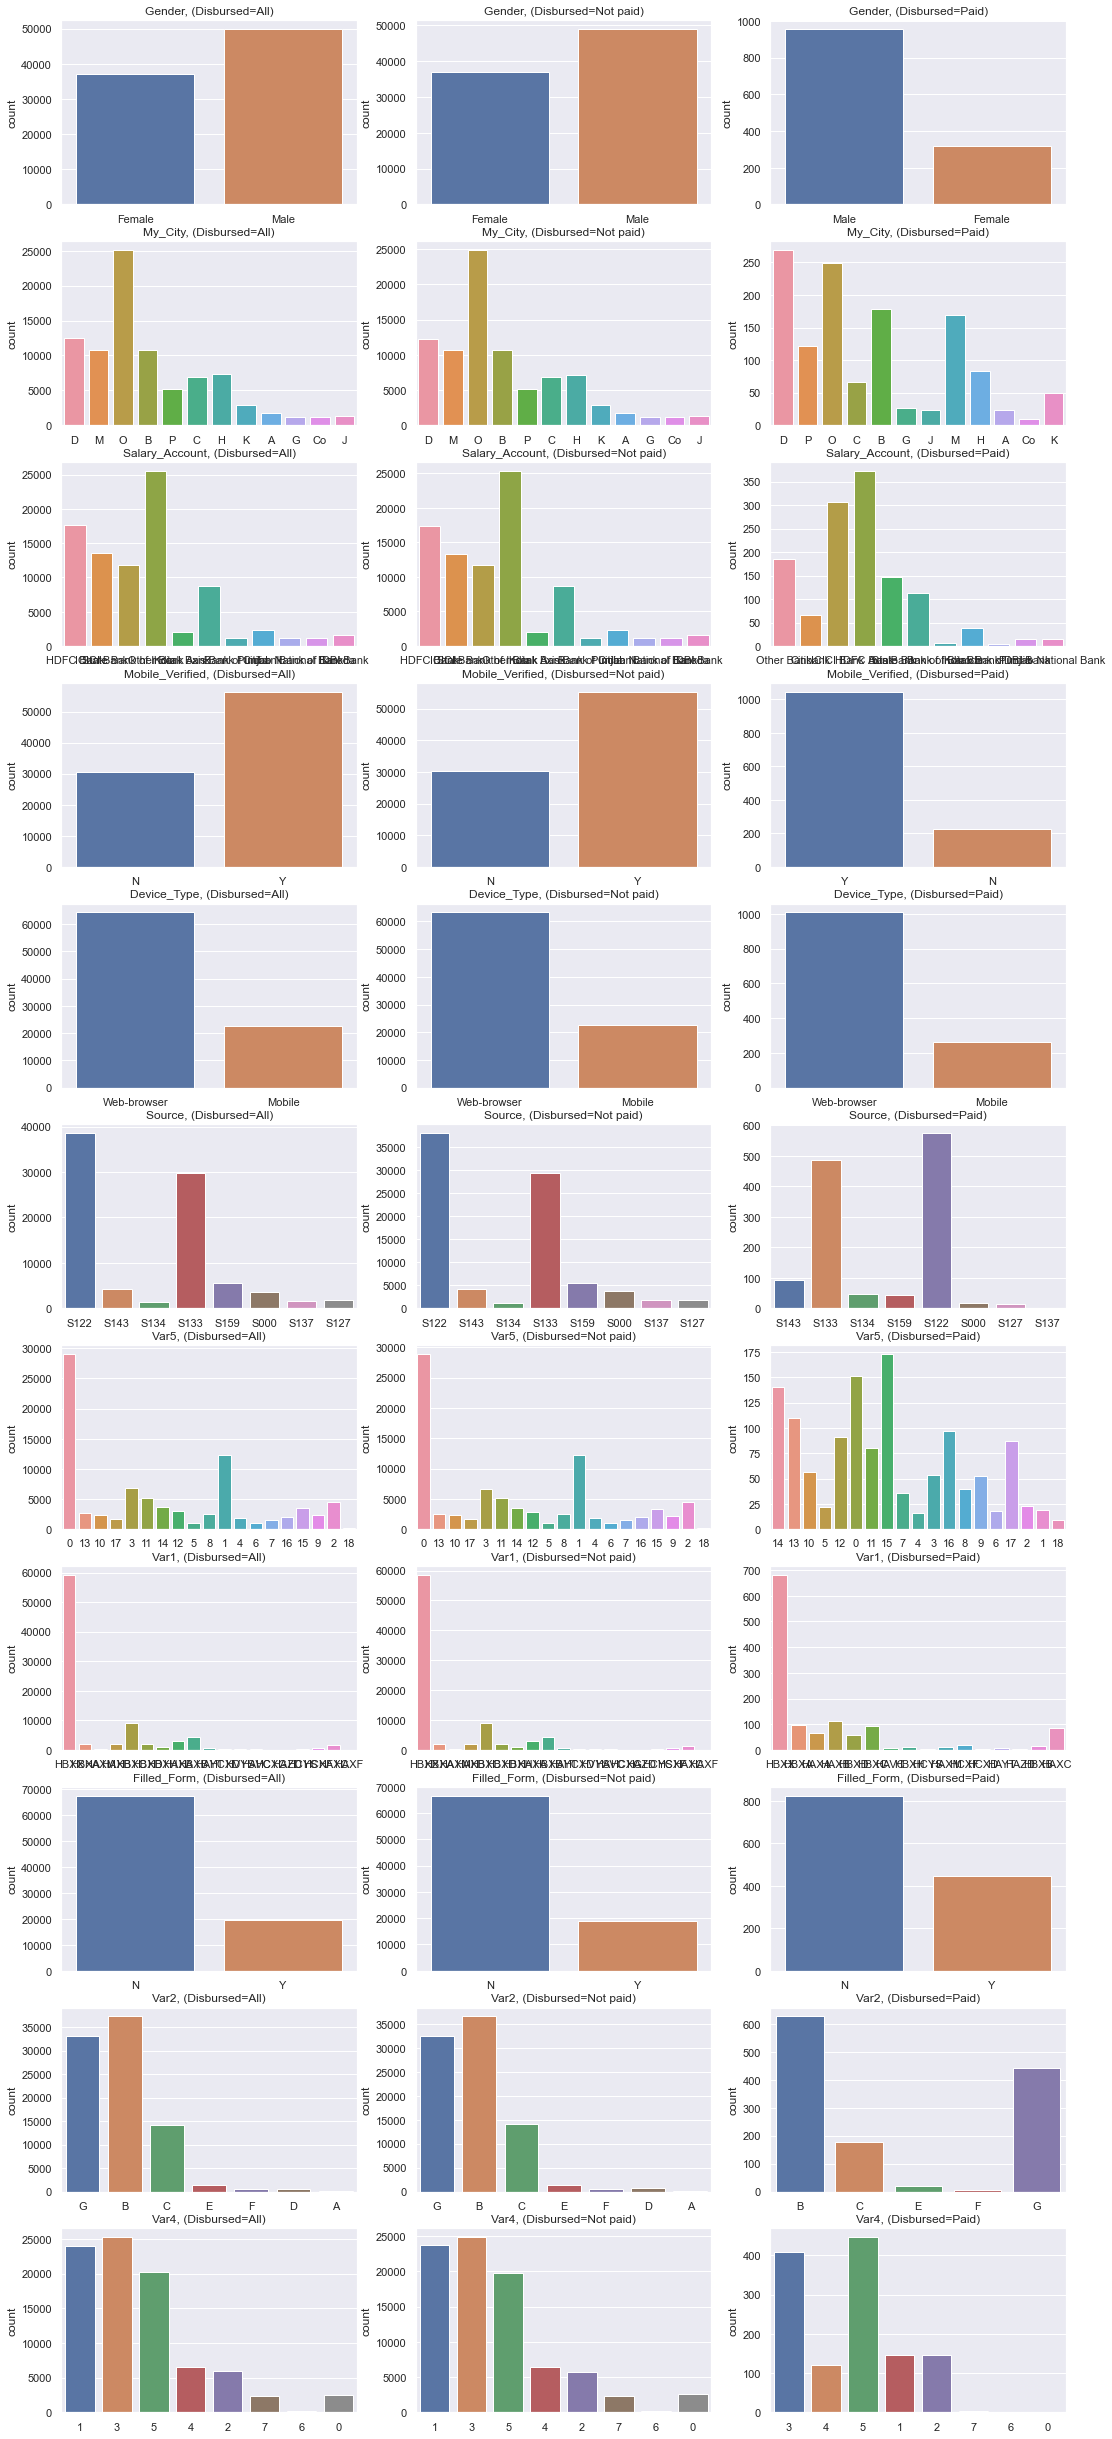

In [101]:
#narysujemy histogramy dla zmiennych kategorycznych

n=len(cat_variables)
fig,ax = plt.subplots(n,3, figsize=(18,n*4), sharex=False)
for i in range(n):
    plt.sca(ax[i,0])
    col = data[cat_variables].columns[i]
    sns.countplot(data[col].values)
    plt.title('{}, (Disbursed=All)'.format(data[cat_variables].columns[i]))
 
    plt.sca(ax[i,1])
    col = data[cat_variables].columns[i]
    sns.countplot(data[data['Disbursed'] == 0][col].values)
    plt.title('{}, (Disbursed=Not paid)'.format(data[cat_variables].columns[i]))
    
    plt.sca(ax[i,2])
    col = data[cat_variables].columns[i]
    sns.countplot(data[data['Disbursed'] == 1][col].values)
    plt.title('{}, (Disbursed=Paid)'.format(data[cat_variables].columns[i]))

In [102]:
data[cat_variables].isna().sum() #sprawdzamy czy są brakujące wartości

Gender             0
My_City            0
Salary_Account     0
Mobile_Verified    0
Device_Type        0
Source             0
Var5               0
Var1               0
Filled_Form        0
Var2               0
Var4               0
dtype: int64

In [103]:
# zmiana typu na string - tak żeby onehotencoder zadziałał
data[cat_variables]=data[cat_variables].astype('str',copy=False)

## Zmienne Numeryczne

In [104]:
data.describe() #Przeglądam zmienne numeryczne

,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Disbursed,Age,My_Employees
count,8.700200e+04,8.693100e+04,86931.000000,8.693100e+04,5.240700e+04,52407.000000,27726.000000,27420.000000,27726.000000,87002.000000,87002.000000,87002.000000
mean,5.886130e+04,2.302972e+05,2.131840,3.696993e+03,3.950106e+05,3.891369,19.197474,5131.150839,10999.528377,0.014632,30.890037,1.274152
std,2.177736e+06,3.542285e+05,2.014168,3.981430e+04,3.082481e+05,1.165359,5.834213,4725.837644,7512.323050,0.120075,7.079899,1.586397
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,5.000000e+04,1.000000,11.990000,200.000000,1176.410000,0.000000,18.000000,0.000000
25%,1.650000e+04,0.000000e+00,0.000000,0.000000e+00,2.000000e+05,3.000000,15.250000,2000.000000,6491.600000,0.000000,26.000000,0.000000
50%,2.500000e+04,1.000000e+05,2.000000,0.000000e+00,3.000000e+05,4.000000,18.000000,4000.000000,9392.970000,0.000000,29.000000,0.693147
75%,4.000000e+04,3.000000e+05,4.000000,3.500000e+03,5.000000e+05,5.000000,20.000000,6250.000000,12919.040000,0.000000,34.000000,2.079442
max,4.445544e+08,1.000000e+07,10.000000,1.000000e+07,3.000000e+06,6.000000,37.000000,50000.000000,144748.280000,1.000000,83.000000,6.309918


In [105]:
data.skew(axis = 0, skipna = True) #sprawdzenie skosności dla zmiennych numerycznych

Monthly_Income           167.543215
Loan_Amount_Applied        5.641660
Loan_Tenure_Applied        0.264277
Existing_EMI             211.747940
Var5                       0.760304
Loan_Amount_Submitted      2.104984
Loan_Tenure_Submitted     -0.843323
Interest_Rate              1.430301
Processing_Fee             2.680109
EMI_Loan_Submitted         2.754955
Var4                       0.221271
Disbursed                  8.084626
Age                        1.466827
My_Employees               1.227404
dtype: float64

#### Dla zmiennych, których skośność > 1. w zrobię przekształcenia - będę wyliczaał logarytm ze zmiennej.

### Zmienna - 'Monthly_Income'

In [106]:
data['Monthly_Income'].isna().sum() #sprawdzam ilość braków danych

0

In [107]:
data['Monthly_Income'].describe()

count    8.700200e+04
mean     5.886130e+04
std      2.177736e+06
min      0.000000e+00
25%      1.650000e+04
50%      2.500000e+04
75%      4.000000e+04
max      4.445544e+08
Name: Monthly_Income, dtype: float64

<AxesSubplot:>

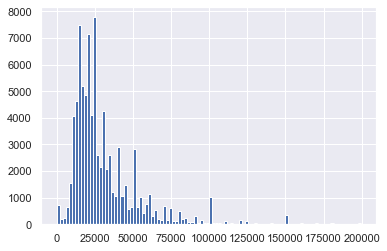

In [108]:
data['Monthly_Income'][data['Monthly_Income'] < 200000].hist(bins=100)

<AxesSubplot:>

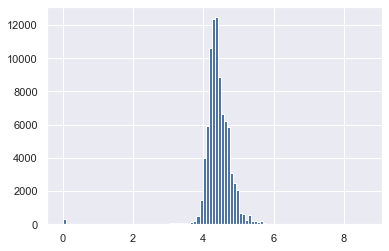

In [109]:
#aby zlikfidowaść skośność przekształce logarytmicznie zbiór (+1 ze względu na zerowe wartości)
data['Monthly_Income_Log'] = np.log10(data['Monthly_Income'] + 1)
data['Monthly_Income_Log'].hist(bins=100)

Text(0.1, 1, 'Monthly_Income_Log vs. Disbursed - Liczebność klas')

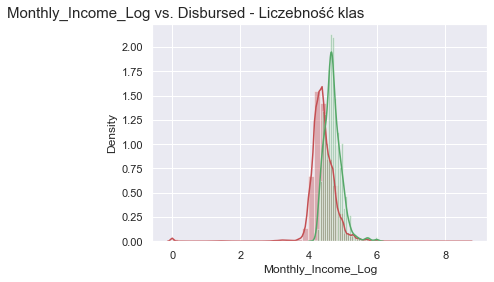

In [110]:
sns.distplot(data['Monthly_Income_Log'][data['Disbursed'] == 0], color='r')
sns.distplot(data['Monthly_Income_Log'][data['Disbursed'] == 1], color='g')
plt.title('Monthly_Income_Log vs. Disbursed - Liczebność klas', x = 0.1, y=1, fontdict={'fontsize': 15})

In [111]:
data['Monthly_Income_Log'].describe()

count    87002.000000
mean         4.405441
std          0.428629
min          0.000000
25%          4.217510
50%          4.397957
75%          4.602071
max          8.647925
Name: Monthly_Income_Log, dtype: float64

In [112]:
num_variables.append('Monthly_Income_Log') # Dodaję zmienne do kontenera num.

### - Zmienna 'Loan_Amount_Applied'

In [113]:
data['Loan_Amount_Applied'].isna().sum() #sprawdzam ilość braków danych

71

In [114]:
data["Loan_Amount_Applied"].describe()

count    8.693100e+04
mean     2.302972e+05
std      3.542285e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+05
75%      3.000000e+05
max      1.000000e+07
Name: Loan_Amount_Applied, dtype: float64

In [115]:
data['Loan_Amount_Applied'].value_counts()

0.0          28836
100000.0     14310
200000.0     13058
300000.0      9995
500000.0      9762
             ...  
560000.0         1
475000.0         1
460000.0         1
1405000.0        1
204000.0         1
Name: Loan_Amount_Applied, Length: 277, dtype: int64

In [116]:
data.loc[data['Loan_Amount_Applied'].isna(), 'Loan_Amount_Applied'] = 0.0

In [117]:
data['Loan_Amount_Applied'].isna().sum()

0

<AxesSubplot:>

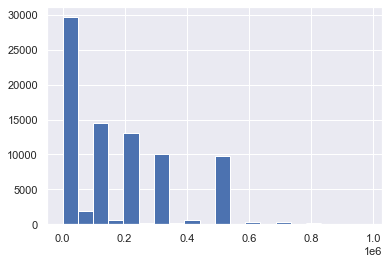

In [118]:
data['Loan_Amount_Applied'][data['Loan_Amount_Applied'] < 10e5].hist(bins=20)

In [119]:
#aby zlikfidowaść skośność przekształcelogarytmicznie zbiór (+1 ze względu na zerowe wartości)
data["Loan_Amount_Applied_log"]=np.log(data["Loan_Amount_Applied"]+1)

<AxesSubplot:>

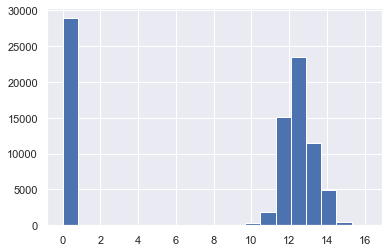

In [120]:
#sns.distplot(data["Loan_Amount_Applied_log"].dropna(), kde=False, bins=20)
data['Loan_Amount_Applied_log'][data['Loan_Amount_Applied_log'] < 10e5].hist(bins=20)

In [121]:
num_variables.append('Loan_Amount_Applied_log')

### - Zmienna 'Loan_Tenure_Applied'

In [122]:
data['Loan_Tenure_Applied'].isna().sum() #sprawdzam ilość braków danych

71

In [123]:
data["Loan_Tenure_Applied"].describe()

count    86931.000000
mean         2.131840
std          2.014168
min          0.000000
25%          0.000000
50%          2.000000
75%          4.000000
max         10.000000
Name: Loan_Tenure_Applied, dtype: float64

In [124]:
data.loc[data['Loan_Tenure_Applied'].isna(), 'Loan_Tenure_Applied'] = 0.0

In [125]:
data['Loan_Tenure_Applied'].isna().sum()

0

In [126]:
data['Loan_Tenure_Applied'].value_counts()

0.0     33897
5.0     19083
3.0     13080
2.0      9463
4.0      6620
1.0      4812
10.0       40
7.0         3
6.0         2
9.0         1
8.0         1
Name: Loan_Tenure_Applied, dtype: int64

In [127]:
num_variables.append('Loan_Tenure_Applied')

### - Zmienna 'Existing_EMI'

In [128]:
data['Existing_EMI'].isna().sum() #sprawdzam ilość braków danych

71

In [129]:
data["Existing_EMI"].describe()

count    8.693100e+04
mean     3.696993e+03
std      3.981430e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.500000e+03
max      1.000000e+07
Name: Existing_EMI, dtype: float64

In [130]:
data[data["Existing_EMI"]==0].shape

(58221, 25)

<AxesSubplot:>

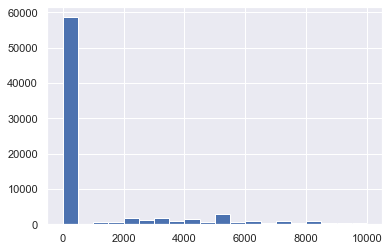

In [131]:
data['Existing_EMI'][data['Existing_EMI'] < 10e3].hist(bins=20)

In [132]:
data.loc[data['Existing_EMI'].isna(), 'Existing_EMI'] = 0.0

In [133]:
data["Existing_EMI_log"]=np.log(data["Existing_EMI"]+1) 
#+1 ze uwagi na zerowe wartości

<AxesSubplot:>

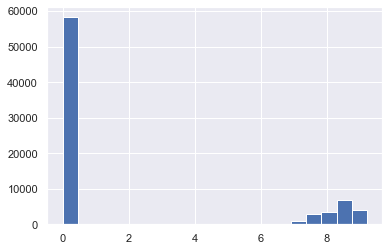

In [134]:
data['Existing_EMI_log'][data['Existing_EMI'] < 10e3].hist(bins=20)

In [135]:
num_variables.append('Existing_EMI_log')

### - Zmienna 'Loan_Amount_Submitted'

In [136]:
data['Loan_Amount_Submitted'].isna().sum()

34595

In [137]:
data["Loan_Amount_Submitted"].describe()

count    5.240700e+04
mean     3.950106e+05
std      3.082481e+05
min      5.000000e+04
25%      2.000000e+05
50%      3.000000e+05
75%      5.000000e+05
max      3.000000e+06
Name: Loan_Amount_Submitted, dtype: float64

<AxesSubplot:xlabel='Loan_Amount_Submitted'>

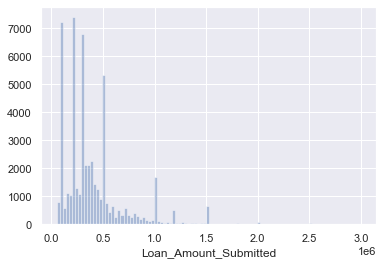

In [138]:
sns.distplot(data['Loan_Amount_Submitted'].dropna(), kde=False,bins=100)

In [139]:
data.loc[data['Loan_Amount_Submitted'].isna(), 'Loan_Amount_Submitted'] = 0

In [140]:
data['Loan_Amount_Submitted'].isna().sum()

0

In [141]:
data['Loan_Amount_Submitted_Log'] = np.log10(data['Loan_Amount_Submitted'] + 1)
#+1 ze względu na zerowe wartości

<AxesSubplot:>

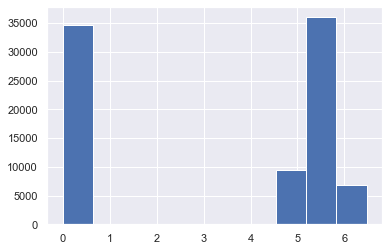

In [142]:
data['Loan_Amount_Submitted_Log'].hist()

<AxesSubplot:xlabel='Loan_Amount_Submitted_Log'>

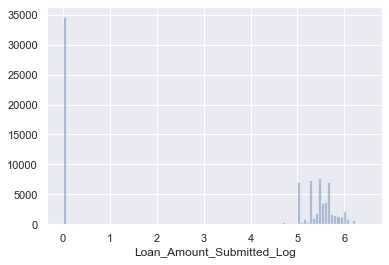

In [143]:
sns.distplot(data['Loan_Amount_Submitted_Log'].dropna(), kde=False,bins=100)

In [144]:
num_variables.append('Loan_Amount_Submitted_Log')

### - Zmienna 'Loan_Tenure_Submitted'

In [145]:
data['Loan_Tenure_Submitted'].isna().sum()

34595

<AxesSubplot:xlabel='Loan_Tenure_Submitted'>

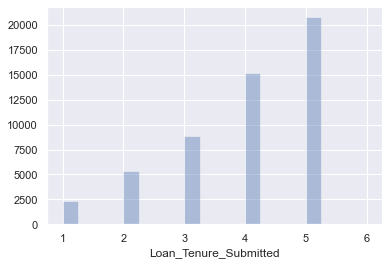

In [146]:
sns.distplot(data["Loan_Tenure_Submitted"].dropna(), kde=False,bins=20)

In [147]:
data.loc[data['Loan_Tenure_Submitted'].isna(), 'Loan_Tenure_Submitted'] = 0

<AxesSubplot:>

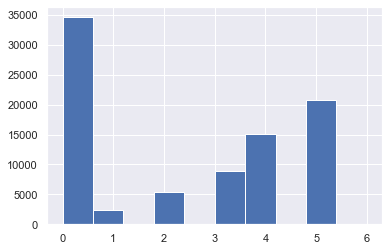

In [148]:
data['Loan_Tenure_Submitted'].hist()

In [149]:
num_variables.append('Loan_Tenure_Submitted')

### - Zmienna 'Interest_Rate'

In [150]:
data['Interest_Rate'].value_counts()

20.00    4707
14.85    2016
13.99    1699
31.50    1696
15.25    1553
         ... 
14.55       2
20.50       2
15.60       1
14.29       1
15.15       1
Name: Interest_Rate, Length: 73, dtype: int64

In [151]:
data.Interest_Rate.isnull().sum()

59276

In [152]:
# Zmiennej nie będę brał pod uwagę, zbyt dużo Nans, nie zapisuje do kontenera num_featurs

### - Zmienna 'Processing_Fee'

In [153]:
data.Processing_Fee.isnull().sum()

59582

In [154]:
 #Zmiennej nie będę brał pod uwagę, zbyt dużo Nans, nie zapisuje do kontenera num_featurs

### - Zmienna 'EMI_Loan_Submitted'

In [155]:
data.EMI_Loan_Submitted.isnull().sum()

59276

In [156]:
 #Zmiennej nie będę brał pod uwagę, zbyt dużo Nans, nie zapisuje do kontenera num_featurs

## Dane numeryczne-podsumowanie

In [157]:
data[num_variables].describe()

,Age,My_Employees,Monthly_Income_Log,Loan_Amount_Applied_log,Loan_Tenure_Applied,Existing_EMI_log,Loan_Amount_Submitted_Log,Loan_Tenure_Submitted
count,87002.000000,87002.000000,87002.000000,87002.000000,87002.000000,87002.000000,87002.000000,87002.000000
mean,30.890037,1.274152,4.405441,8.259975,2.130100,2.892483,3.304067,2.344027
std,7.079899,1.586397,0.428629,5.876491,2.014266,4.172069,2.695559,2.108340
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,0.000000,4.217510,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,0.693147,4.397957,11.512935,2.000000,0.000000,5.176094,3.000000
75%,34.000000,2.079442,4.602071,12.611541,4.000000,8.160804,5.556304,4.000000
max,83.000000,6.309918,8.647925,16.118096,10.000000,16.118096,6.477121,6.000000


In [158]:
data[num_variables].isna().sum() # braki w danych

Age                          0
My_Employees                 0
Monthly_Income_Log           0
Loan_Amount_Applied_log      0
Loan_Tenure_Applied          0
Existing_EMI_log             0
Loan_Amount_Submitted_Log    0
Loan_Tenure_Submitted        0
dtype: int64

In [159]:
data[num_variables].skew(axis = 0, skipna = True) #skośność przekształconych zmiennych

Age                          1.466827
My_Employees                 1.227404
Monthly_Income_Log          -3.809544
Loan_Amount_Applied_log     -0.664176
Loan_Tenure_Applied          0.265646
Existing_EMI_log             0.787968
Loan_Amount_Submitted_Log   -0.393356
Loan_Tenure_Submitted        0.011081
dtype: float64

In [160]:
print("/-----Dane categoryczne-podsumowanie-----/\n")

for i in cat_variables:
    print(data[i].value_counts())
    print("/----------------------------------------/\n")

/-----Dane categoryczne-podsumowanie-----/

Male      49831
Female    37171
Name: Gender, dtype: int64
/----------------------------------------/

O     25108
D     12524
B     10821
M     10791
H      7270
C      6916
P      5207
K      2888
A      1787
J      1331
G      1212
Co     1147
Name: My_City, dtype: int64
/----------------------------------------/

Other Bank              25555
HDFC Bank               17695
ICICI Bank              13636
State Bank of India     11843
Axis Bank                8783
Citibank                 2376
Kotak Bank               2067
IDBI Bank                1550
Punjab National Bank     1201
Bank of India            1170
Bank of Baroda           1126
Name: Salary_Account, dtype: int64
/----------------------------------------/

Y    56464
N    30538
Name: Mobile_Verified, dtype: int64
/----------------------------------------/

Web-browser    64298
Mobile         22704
Name: Device_Type, dtype: int64
/----------------------------------------/

S122    

In [161]:
data[cat_variables].nunique() # wartości unikalne

Gender              2
My_City            12
Salary_Account     11
Mobile_Verified     2
Device_Type         2
Source              8
Var5               19
Var1               19
Filled_Form         2
Var2                7
Var4                8
dtype: int64

# Modelowanie

## PRZYGOTOWANIE DANYCH DO MODELOWANIA

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

seed=100

In [163]:
#sklaluje dane numeryczne
col_transformer = ColumnTransformer([
    ('scaler', StandardScaler(), num_variables)],
    remainder = 'passthrough')

In [164]:
# tworzę kontener dla kolumn które usunę
del_variables = ['Processing_Fee', 'Interest_Rate', 'EMI_Loan_Submitted']

In [165]:
data = data.drop(del_variables, axis=1, inplace=False)

In [166]:
dataset = pd.get_dummies(data=data, columns=cat_variables, drop_first=True)

In [167]:
dataset

,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Loan_Amount_Submitted,Loan_Tenure_Submitted,Disbursed,Age,My_Employees,Monthly_Income_Log,...,Var2_E,Var2_F,Var2_G,Var4_1,Var4_2,Var4_3,Var4_4,Var4_5,Var4_6,Var4_7
0,20000,300000.0,5.0,0.0,0.0,0.0,0,37,0.000000,4.301052,...,0,0,1,1,0,0,0,0,0,0
1,35000,200000.0,2.0,0.0,200000.0,2.0,0,30,6.309918,4.544080,...,0,0,1,0,0,1,0,0,0,0
2,22500,600000.0,4.0,0.0,450000.0,4.0,0,34,0.000000,4.352202,...,0,0,0,1,0,0,0,0,0,0
3,35000,1000000.0,5.0,0.0,920000.0,5.0,0,28,1.098612,4.544080,...,0,0,0,0,0,1,0,0,0,0
4,100000,500000.0,2.0,25000.0,500000.0,2.0,0,31,1.386294,5.000004,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87015,71901,1000000.0,5.0,14500.0,0.0,0.0,0,46,0.000000,4.856741,...,0,0,1,0,0,1,0,0,0,0
87016,16000,0.0,0.0,0.0,240000.0,4.0,0,25,0.693147,4.204147,...,0,0,1,0,0,0,0,1,0,0
87017,118000,0.0,0.0,0.0,1200000.0,4.0,0,43,0.000000,5.071886,...,0,0,1,0,0,1,0,0,0,0
87018,98930,800000.0,5.0,13660.0,800000.0,5.0,0,38,3.526361,4.995332,...,0,0,1,0,0,1,0,0,0,0


In [168]:
X = col_transformer.fit_transform(dataset.drop('Disbursed', axis=1))

In [169]:
X.shape

(87002, 93)

In [170]:
y = dataset['Disbursed']

In [171]:
y.shape

(87002,)

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# dzielę zbiór na dane Trenigowe i Testowe 

In [173]:
X_train.shape

(60901, 93)

In [174]:
X_test.shape

(26101, 93)

In [175]:
y_train.shape

(60901,)

In [176]:
y_test.shape

(26101,)

In [177]:
y_test.value_counts()

0    25703
1      398
Name: Disbursed, dtype: int64

In [178]:
y_train.value_counts()

0    60026
1      875
Name: Disbursed, dtype: int64

##  Sprawdzam bazowy model dla niezbalansowanych klas LogisticRegression

In [179]:
pipeline = Pipeline([
                ('classifier', LogisticRegression())])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('classifier', LogisticRegression())])

In [180]:
print(classification_report(y_test, pipeline.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     25703
           1       0.00      0.00      0.00       398

    accuracy                           0.98     26101
   macro avg       0.49      0.50      0.50     26101
weighted avg       0.97      0.98      0.98     26101



### Z powodu niezbalansowanego zbioru model nie daje zadawalających wyników 
### Musimy użyć metod na niezbalansowane klasy, sprawdzę metodę undersampling 
### oraz poszukam optymalnych parametrów za pomocą GridSearchCV

In [181]:
undersample = RandomUnderSampler(random_state=seed)
X_train_undersample, y_train_undersample = undersample.fit_resample(X_train, y_train)

In [182]:
#bazowy model undersampling
pipeline_unders = Pipeline([
                    ('classifier', LogisticRegression())])

pipeline_unders.fit(X_train_undersample, y_train_undersample)

#ocena na danych train
print(metrics.roc_auc_score(y_train_undersample, pipeline_unders.predict_proba(X_train_undersample)[:,1]))

0.7265697959183673


### Sprawdze modele z undersamplingiem oraz użyje GridSearchCV w celu znalezienia optymalnych partametrów

In [183]:
kfold = StratifiedKFold(n_splits=10, random_state=seed)
models=[]

names = [
    "Under_GaussianNB",
    "Under_LogisticRegression",
    "Under_RandomForestClassifier",
    "Under_DecisionTreeClassifier",
    "Under_KNeighborsClassifier",
    "Under_XGBClassifier",
    "Under_SVC", 
]

pipelines = [
    Pipeline(steps=[
                    ("classifier", GaussianNB())]
            ),
    Pipeline(steps=[
                    ("classifier", LogisticRegression())]
            ),
    Pipeline(steps=[
                    ("classifier", RandomForestClassifier())]
            ),
    Pipeline(steps=[
                    ("classifier", DecisionTreeClassifier())]
            ),
    Pipeline(steps=[
                    ("classifier", KNeighborsClassifier())]
            ),
    Pipeline(steps=[
                    ("classifier", XGBClassifier())]
            ),
    Pipeline(steps=[
                    ("classifier", SVC(probability=True))]
            ),
]

param_grids = [
    {
    },  
    {    
            "classifier__C": [0.1, 1, 10]
    },
    {
            "classifier__n_estimators": [100, 200, 300],
            "classifier__min_samples_leaf": [2, 5],
            "classifier__max_depth": [None, 20, 10]
    },

    {
            "classifier__min_samples_leaf": [2, 5, 10],
            "classifier__max_leaf_nodes": [5, 10, 25],
            "classifier__max_depth": [None, 10, 5]
    },
    {
    },
    {
            "classifier__n_estimators": [100, 200, 650, 700],
            "classifier__learning_rate": [0.001, 0.1, 0.5,],
            "classifier__max_depth": [3, 5, 10]
    },
    {
            "classifier__gamma": [0.01, 0.1, 1],
            "classifier__C": [0.1, 1, 10, 15]
    },
]

for name, mod, grid in zip(names, pipelines, param_grids):
    gs = GridSearchCV(mod, grid, cv=kfold, return_train_score=True , refit=True)
    gs.fit(X_train_undersample, y_train_undersample)
    models.append((name, gs.best_estimator_))
    print(name)
    print(gs.best_params_)

Under_GaussianNB
{}
Under_LogisticRegression
{'classifier__C': 0.1}
Under_RandomForestClassifier
{'classifier__max_depth': 20, 'classifier__min_samples_leaf': 2, 'classifier__n_estimators': 100}
Under_DecisionTreeClassifier
{'classifier__max_depth': None, 'classifier__max_leaf_nodes': 10, 'classifier__min_samples_leaf': 2}
Under_KNeighborsClassifier
{}
Under_XGBClassifier
{'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
Under_SVC
{'classifier__C': 1, 'classifier__gamma': 0.01}


### Sprawdzam jak modele radzą sobie na danych Train

In [184]:
names=[]
precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    names.append(name)
    precision_score.append(metrics.precision_score(y_train_undersample, model.predict(X_train_undersample), average='weighted'))
    recall_score.append(metrics.recall_score(y_train_undersample, model.predict(X_train_undersample), average='weighted'))
    f1_score.append( metrics.f1_score(y_train_undersample, model.predict(X_train_undersample), average='weighted'))
    accuracy_score.append(metrics.accuracy_score(y_train_undersample, model.predict(X_train_undersample)))
    roc_auc_score.append(metrics.roc_auc_score(y_train_undersample, model.predict_proba(X_train_undersample)[:,1]))
    
d = {'roc_auc_score': roc_auc_score, 
     'precision_score': precision_score, 
     'recall_score': recall_score,
     'f1_score' : f1_score,
     'accuracy_score' : accuracy_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=names)
df

,Method,roc_auc_score,precision_score,recall_score,f1_score,accuracy_score
0,Under_GaussianNB,0.748353,0.664537,0.600000,0.556512,0.600000
1,Under_LogisticRegression,0.726570,0.642839,0.556571,0.477712,0.556571
2,Under_RandomForestClassifier,0.992827,0.946793,0.945714,0.945681,0.945714
3,Under_DecisionTreeClassifier,0.832496,0.767915,0.765143,0.764534,0.765143
4,Under_KNeighborsClassifier,0.883080,0.795676,0.794286,0.794044,0.794286
5,Under_XGBClassifier,0.914002,0.829734,0.823429,0.822580,0.823429
6,Under_SVC,0.994403,0.968061,0.968000,0.967999,0.968000


### oraz na danych Testowych
### Porównanie przeliczonych modeli na danych testowych:

In [185]:
names=[]
precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    names.append(name)
    precision_score.append(metrics.precision_score(y_test, model.predict(X_test), average='weighted'))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test), average='weighted'))
    f1_score.append( metrics.f1_score(y_test, model.predict(X_test), average='weighted'))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))
    roc_auc_score.append(metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
    
d = {'roc_auc_score': roc_auc_score, 
     'precision_score': precision_score, 
     'recall_score': recall_score,
     'f1_score' : f1_score,
     'accuracy_score' : accuracy_score,
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=names)
df

,Method,roc_auc_score,precision_score,recall_score,f1_score,accuracy_score
0,Under_GaussianNB,0.744253,0.974025,0.881729,0.923713,0.881729
1,Under_LogisticRegression,0.706186,0.979264,0.177426,0.280181,0.177426
2,Under_RandomForestClassifier,0.836626,0.981914,0.680740,0.795918,0.680740
3,Under_DecisionTreeClassifier,0.800156,0.980207,0.669783,0.788226,0.669783
4,Under_KNeighborsClassifier,0.763681,0.979530,0.677292,0.793691,0.677292
5,Under_XGBClassifier,0.837593,0.981681,0.695874,0.806646,0.695874
6,Under_SVC,0.606761,0.981618,0.266695,0.402009,0.266695


## Podsumowanie Wyników

- Wnioski: Najlepiej z przewidywaniem kto dostanie porzyczke radzi sobie model Under_XGBClassifier (najwyższy Roc auc score), bardzo dobry wynik ma też Under_RandomForestClassifier. 
- Model Under_SVC miał świetny wynik na zbiorze treningowym, ale na zbiorze testowym nie pordził już sobie tak dobrze.
    